# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian.optimize import bayesian_optimize
from xopt.bayesian.generators import exploration

# test function
from xopt.evaluators import test_TNK
?bayesian_optimize

Signature:
bayesian_optimize(
    vocs,
    evaluate_f,
    candidate_generator,
    output_path=None,
    custom_model=None,
    executor=<xopt.tools.DummyExecutor object at 0x0000020B0A2A2B50>,
    restart_file=None,
    initial_x=None,
    n_initial_samples=1,
    n_steps=1,
    verbose=True,
    ref=None,
)
Docstring:
Parameters
----------
ref
vocs
verbose
n_steps
n_initial_samples
initial_x
executor
restart_file
custom_model
output_path
candidate_generator
config : dict
    Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

evaluate_f : callable
    Returns dict of outputs after problem has been evaluated

gen_candidate : callable
    Callable that takes the form f(model, bounds, vocs, **kwargs) and returns 1 or more candidates

**kwargs
    Optional arguments for acquisition function optimization

Returns
-------
results : dict
    Dictionary object containing optimization points + other info
File:      c:\users\ryan roussel\documents\g

In [2]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

# create sample generator
gen = exploration.BayesianExplorationGenerator()

# Run - see comments for example options
results = bayesian_optimize(VOCS, EVALUATE, gen,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=30,                            ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               # custom_model = myCustomModel,        ## Specify custom model creation function
                                verbose=True)

Candidate(s): tensor([[0.4976, 0.0000]], dtype=torch.float64)
Candidate(s): tensor([[3.1416, 0.0000]], dtype=torch.float64)
Candidate(s): tensor([[0.9853, 0.8781]], dtype=torch.float64)
Candidate(s): tensor([[0.0000, 0.7723]], dtype=torch.float64)
Candidate(s): tensor([[0.6467, 0.9942]], dtype=torch.float64)
Candidate(s): tensor([[0.3528, 1.0396]], dtype=torch.float64)
Candidate(s): tensor([[1.1273, 0.5109]], dtype=torch.float64)
Candidate(s): tensor([[1.1011, 0.2908]], dtype=torch.float64)
Candidate(s): tensor([[1.0344, 0.1118]], dtype=torch.float64)
Candidate(s): tensor([[0.2362, 1.1010]], dtype=torch.float64)
Candidate(s): tensor([[0.7698, 1.0879]], dtype=torch.float64)
Candidate(s): tensor([[0.8186, 0.7341]], dtype=torch.float64)
Candidate(s): tensor([[1.1047, 0.8159]], dtype=torch.float64)
Candidate(s): tensor([[0.1116, 1.0619]], dtype=torch.float64)
Candidate(s): tensor([[0.5606, 1.1702]], dtype=torch.float64)
Candidate(s): tensor([[1.0480, 0.0806]], dtype=torch.float64)
Candidat

dict_keys(['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model'])


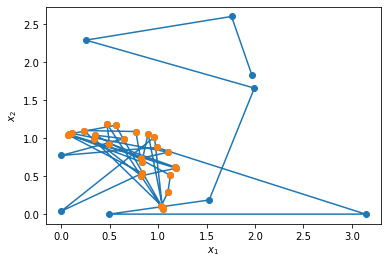

In [3]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [4]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               use_gpu=False,                         ## Use GPU
                               n_steps=30,                            ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               # batch_size = 5,                      ## Specify batched exploration
                               # custom_model = myCustomModel,        ## Specify custom model creation function
                               sigma=torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                               verbose=False)

NameError: name 'bayesian_exploration' is not defined

In [ ]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()